In [124]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random

import joblib

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, LSTM

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# resample signal to n samples
from scipy.signal import resample

# XML parser
import xml.etree.ElementTree as ET

# encoding and normalizing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

NUM_POINTS = 50

In [125]:
tester = []

for root, subdirs, files in os.walk('dataset/michael_dataset'):
    if 'ipynb_checkpoint' in root:
        continue
    
    if len(files) > 0:
        for f in tqdm(files):
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                
                xml_root = ET.parse(f'{root}/{f}').getroot()
                
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                    
                points = np.array(points, dtype=float)
                
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                
                resampled = resample(points, NUM_POINTS)
                
                tester.append((label, resampled))

  0%|          | 0/150 [00:00<?, ?it/s]

In [126]:
data = []

for root, subdirs, files in os.walk('dataset/michael_dataset'):
    if 'ipynb_checkpoint' in root:
        continue
    
    if len(files) > 0:
        for f in tqdm(files):
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                
                xml_root = ET.parse(f'{root}/{f}').getroot()
                
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                    
                points = np.array(points, dtype=float)
                
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                
                resampled = resample(points, NUM_POINTS)
                
                data.append((label, resampled))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [127]:
print(data[0])
print(len(data))

('delete_mark', array([[-0.78899123,  1.68329284],
       [-1.25697283,  1.64908508],
       [-0.93277516,  1.4759012 ],
       [-0.71502293,  1.18829376],
       [-0.29513583,  0.87511113],
       [ 0.11237526,  0.50060478],
       [ 0.40212079,  0.30733168],
       [ 0.72021664, -0.04385007],
       [ 0.89588076, -0.19282201],
       [ 1.066854  , -0.40400357],
       [ 1.18483239, -0.56784903],
       [ 1.23368809, -0.66889983],
       [ 1.26955323, -0.77151867],
       [ 1.29555204, -0.83540505],
       [ 1.29631362, -0.87764999],
       [ 1.31554554, -0.92039753],
       [ 1.30697045, -0.93894211],
       [ 1.30715513, -0.96110253],
       [ 1.25008878, -0.97423473],
       [ 1.21467781, -0.9795461 ],
       [ 1.04948733, -0.97533405],
       [ 0.71879653, -0.96468629],
       [ 0.35166445, -0.95168279],
       [-0.14982526, -0.92686423],
       [-0.54878969, -0.88302293],
       [-0.84986326, -0.85343246],
       [-1.13323128, -0.81007647],
       [-1.29681308, -0.76873931],
    

## Let's have a look at our data

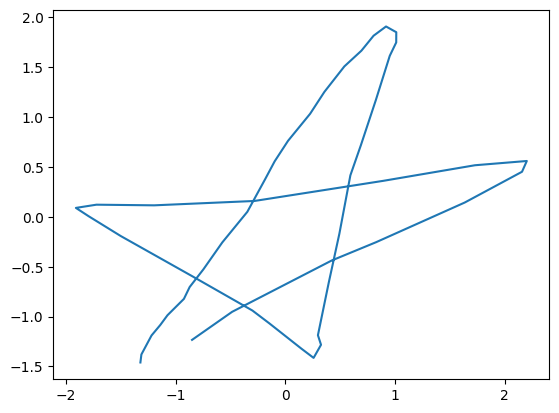

In [128]:
test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]
sequence

plt.plot(sequence.T[0], sequence.T[1]*-1)

In [129]:
# Prepare the data
labels = [sample[0] for sample in data]

print(set(labels))

encoder = joblib.load('label_encoder.pkl')
labels_encoded = encoder.transform(labels)

print(set(labels_encoded))

y = to_categorical(labels_encoded)

print(len(y[0]))

sequences = [sample[1] for sample in data]
X = np.array(sequences)


{'rectangle', 'x', 'right_sq_bracket', 'left_sq_bracket', 'star', 'delete_mark', 'left_curly_brace', 'right_curly_brace', 'v', 'pigtail', 'check', 'circle', 'question_mark', 'caret', 'triangle', 'arrow'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
16


In [ ]:
# hier dann die modelle laden


In [132]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,282 (231.57 KB)

 Trainable params: 19,760 (77.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,522 (154.39 KB)

In [134]:
# Prepare the data
labels_test = [sample[0] for sample in tester]

print(set(labels))
labels_encoded = encoder.transform(labels_test)

print(set(labels_encoded))

y_test = to_categorical(labels_encoded)

print(len(y[0]))

sequences = [sample[1] for sample in tester]
X_test = np.array(sequences)

{'rectangle', 'x', 'right_sq_bracket', 'left_sq_bracket', 'star', 'delete_mark', 'left_curly_brace', 'right_curly_brace', 'v', 'pigtail', 'check', 'circle', 'question_mark', 'caret', 'triangle', 'arrow'}
{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15}
16


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


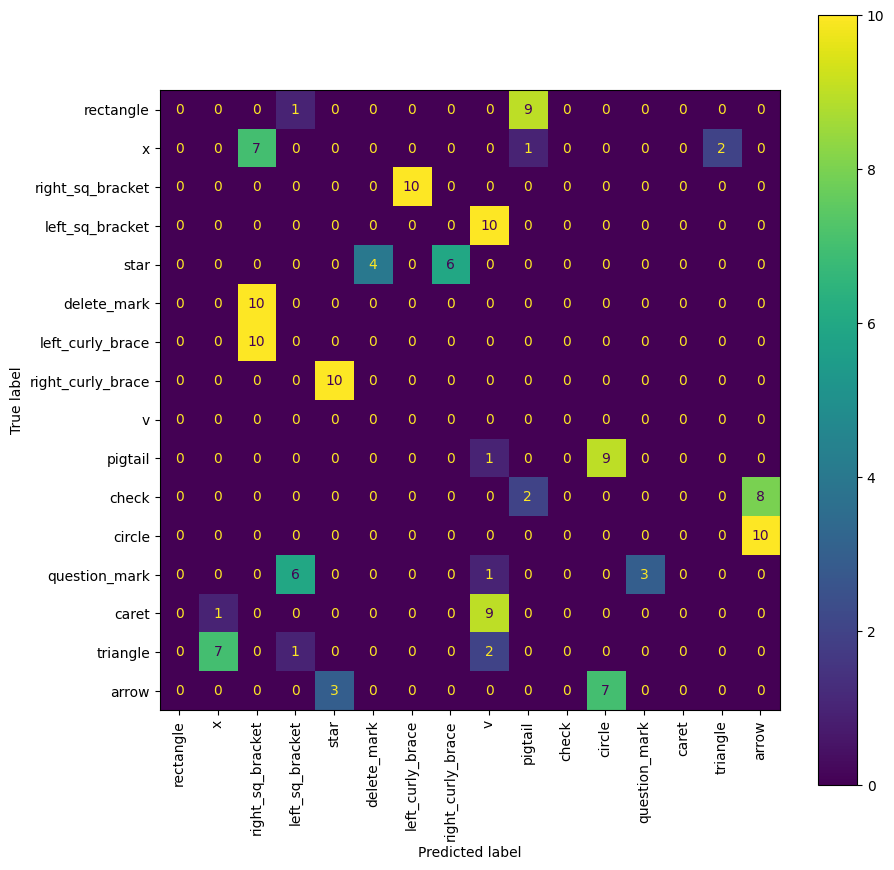

In [135]:
# let the model make predictions for our training data
y_predictions = model.predict(X_test) # hier model ändern

# to build a confusion matrix, we have to convert it to classifications
# this can be done by using the argmax() function to set the probability to 1 and the rest to 0
y_predictions = np.argmax(y_predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

# create and plot confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_predictions)

fig = plt.figure(figsize=(10, 10))

ConfusionMatrixDisplay(conf_matrix, display_labels=set(labels)).plot(ax=plt.gca())

plt.xticks(rotation=90, ha='center')
pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Label:      caret
Prediction: caret


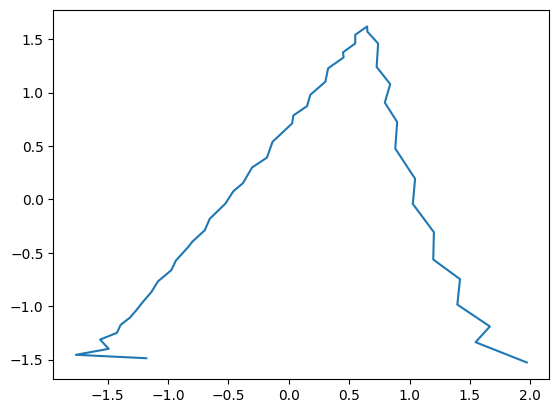

In [136]:
# lets test the model in action

test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]
sequence

plt.plot(sequence.T[0], sequence.T[1]*-1)

prediction = model.predict(np.array([sequence]))
prediction = np.argmax(prediction)

prediction_label = encoder.inverse_transform(np.array([prediction]))[0]

print('Label:     ', label)
print('Prediction:', prediction_label)

In [137]:
correct_predictions = 0
total_attempts = 0

for sample in data:
    label = sample[0]
    sequence = sample[1]
    sequence

    prediction = model.predict(np.array([sequence])) # hier model ändern
    prediction = np.argmax(prediction)

    prediction_label = encoder.inverse_transform(np.array([prediction]))[0]
    
    if label == prediction_label:
        correct_predictions += 1
    total_attempts += 1
accuracy = correct_predictions / total_attempts
print(accuracy)

2


ValueError: Invalid dtype: str32